In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

#mis funciones
import src


# para que salga el grafico
%matplotlib inline

pd.set_option('display.max_columns', None)


In [2]:
#Load data
data = pd.read_csv('../data/attacks.csv', encoding = 'latin1')

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#vemos las dimensiones 
dim_original = data.shape
dim_original

(25723, 24)

In [5]:
#vemos el contenido
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
#renombrar columnas
data.columns = data.columns.str.strip()
data = data.set_axis(['case_number_1', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time',
       'species', 'source', 'pdf', 'href1', 'href2',
       'case_number_2', 'case_number_3', 'original_order', 'unnamed_22','unnamed_23'], axis=1)
data.columns

Index(['case_number_1', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'source', 'pdf', 'href1', 'href2', 'case_number_2', 'case_number_3',
       'original_order', 'unnamed_22', 'unnamed_23'],
      dtype='object')

In [8]:
#mostrar registros duplicados
data.drop_duplicates().shape, data.shape

((6312, 24), (25723, 24))

In [9]:
#elimina registros duplicados
data.drop_duplicates(inplace=True)
data.shape

(6312, 24)

In [10]:
#mostrar el numero de valores nulos por columna

nan_cols = data.isnull().sum()

nan_cols[nan_cols>0]

case_number_1        2
date                10
year                12
type                14
country             60
area               465
location           550
activity           554
name               220
sex                575
age               2841
injury              38
fatal              549
time              3364
species           2848
source              27
pdf                 10
href1               11
href2               10
case_number_2       10
case_number_3       10
original_order       3
unnamed_22        6311
unnamed_23        6310
dtype: int64

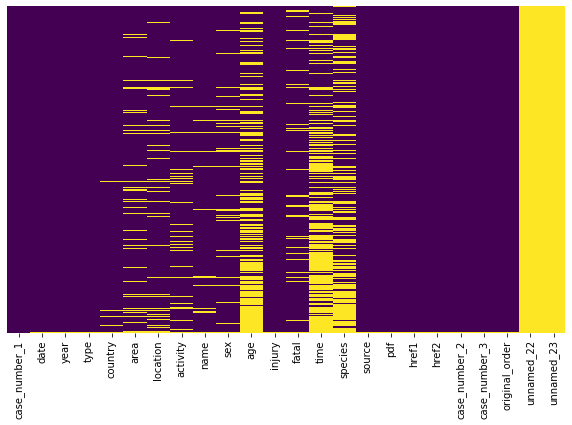

In [11]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

In [12]:
data = data.dropna(subset=['country','year','fatal','species','sex','age'])
##Borra todos los registros que tengan nulos en el subset de datos a analizar

In [13]:
data.shape

(1959, 24)

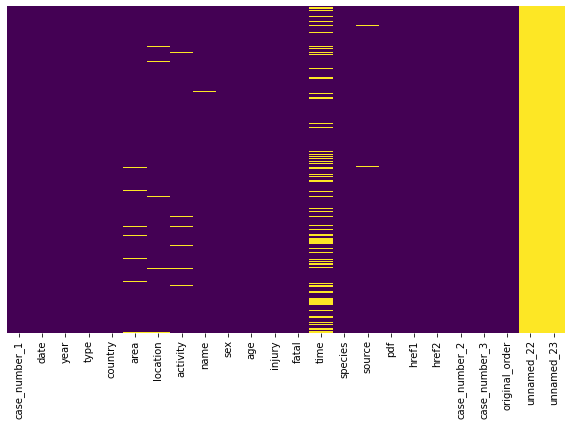

In [14]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show()

In [15]:
#Limpieza de columna "sex" (elimina todo lo que no tiene info)
data.drop(data[(data.sex != 'M') & (data.sex != 'F')].index, axis=0, inplace=True)

In [16]:
#limpieza de columna "fatal" (elimina todo lo que no tiene info)
data.drop(data[(data.fatal != 'Y') & (data.fatal != 'N')].index, axis=0, inplace=True)

In [17]:
##uso regex para eliminar todo lo que en la columna age sea diferente a un numero

patron = r'^[0-9]+$'
data.drop(data[~data['age'].str.contains(patron)].index, axis=0, inplace=True)
data['age'] = pd.to_numeric(data['age'],downcast='integer')

In [18]:
##Limpiar fechas: funcion fechas

data['date'] = data['date'].apply(src.fechas)

data.drop(data[(data.year == 0.0)].index, axis=0, inplace=True)


In [19]:
data.shape

(1900, 24)

In [20]:
#convertir el ano y la fecha a formato correcto
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.to_numeric(data['year'],downcast='integer')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 5969
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   case_number_1   1900 non-null   object        
 1   date            1900 non-null   datetime64[ns]
 2   year            1900 non-null   int16         
 3   type            1900 non-null   object        
 4   country         1900 non-null   object        
 5   area            1866 non-null   object        
 6   location        1866 non-null   object        
 7   activity        1872 non-null   object        
 8   name            1899 non-null   object        
 9   sex             1900 non-null   object        
 10  age             1900 non-null   int8          
 11  injury          1900 non-null   object        
 12  fatal           1900 non-null   object        
 13  time            1438 non-null   object        
 14  species         1900 non-null   object        
 15  sour

In [21]:
#Limpieza de la columna "species": Funcion especies

data['species'] = data['species'].apply(src.especies)



In [22]:
#Limpieza de columna de horas: Funcion horas

data.time.fillna('Unknown', inplace=True)

data['time'] = data['time'].apply(src.hora)

In [23]:
data.to_csv('../data/attacks_clean.csv',index=False)